# Zadanie 1. Celem zadania jest zapoznanie się z metodą analizy głównych składowych (ang. Principal Component Analysis, PCA). Pracować będziemy na zbiorze Plantdoc dataset1. Jest to zbiór zdjęć przedstawiający choroby popularnych roślin uprawnych.

## Preprocesing danych

### 1. Wybierz ze zbioru Plantdoc podzbiór kilkudziesięciu (np. 60) zdjęć przedstawiających trzy choroby roślin jednego gatunku (np. 3 choroby ziemniaków lub 3 choroby pomidorów, po 20 zdjęć dla każdej choroby).

#### Wybrano choroby ziemniaków

### zmiana nazw plików aby ułatwić rozróżnianie chorób

In [ ]:
import os

# Ścieżka do folderu z plikami
folder_path = "choroba3"

# Pobierz listę plików w folderze
files = os.listdir(folder_path)

# Zainicjuj zmienną licznikową
count = 41

# Iteruj przez każdy plik w folderze
for filename in files:
    # Buduj nową nazwę pliku z numerem
    new_filename = str(count) + ".jpg"  # Zmiana rozszerzenia pliku jeśli potrzebne
    
    # Buduj pełną ścieżkę do pliku
    old_filepath = os.path.join(folder_path, filename)
    new_filepath = os.path.join(folder_path, new_filename)
    
    # Zmień nazwę pliku
    os.rename(old_filepath, new_filepath)
    
    # Zwiększ licznik
    count += 1


### 2. Wczytaj zdjęcia do pamięci. Po wczytaniu każde zdjęcie będzie trójwymiarowym tensorem. Można wykorzystać funkcję matplotlib.imread albo wykorzystać bibliotkę imageio lub Pillow.

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [34]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images


### 3. Przeskaluj wszystkie zdjęcia do rozdzielczości 224 × 224, tak aby wszystkie obrazy miały ten sam rozmiar, równy 224 × 224 × 3.

In [35]:
def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img in images:
        resized_img = img.resize(target_size)
        resized_images.append(resized_img)
    return resized_images


In [36]:
# Wczytanie zdjęć z folderu
folder_path = "choroby_sort"
images = load_images_from_folder(folder_path)

resized_images = resize_images(images)

# Konwersja do tablicy numpy
resized_image_tensors = np.array([np.array(img) for img in resized_images])

# Sprawdzenie nowych wymiarów
print("Shape of resized image tensors:", resized_image_tensors.shape)

Shape of resized image tensors: (60, 224, 224, 3)


### 4.Skonwertuj obrazy do skali szarości, tak aby z trójwymiarowego tensora reprezentującego dane zdjęcie otrzymać tablicę dwuwymiarową

In [37]:
def convert_to_grayscale(images):
    grayscale_images = []
    for img in images:
        grayscale_img = img.convert('L')
        grayscale_images.append(grayscale_img)
    return grayscale_images

# Konwersja obrazów do skali szarości
grayscale_images = convert_to_grayscale(resized_images)

# Konwersja do tablicy numpy
grayscale_image_arrays = np.array([np.array(img) for img in grayscale_images])

# Sprawdzenie nowych wymiarów
print("Shape of grayscale image arrays:", grayscale_image_arrays.shape)

Shape of grayscale image arrays: (60, 224, 224)


### 5. Skonwertuj obrazy, będące teraz tablicami dwuwymiarowymi (macierzami) na wektory. Pomocna będzie jedna z funkcji: np.reshape, np.ravel, np.flatten. Funkcje np.reshape i np.ravel zwracają, gdy tylko jest to możliwe, widok oryginalej tablicy. Funkcja np.flatten zwraca kopię tablicy, co zwykle jest niepożądane. Każdy obraz powinien być teraz reprezentowany przez wektor o rozmiarze 50 176

In [38]:
def convert_to_vectors(images):
    image_vectors = []
    for img in images:
        img_vector = np.reshape(img, -1)
        image_vectors.append(img_vector)
    return image_vectors

# Konwersja obrazów do wektorów
image_vectors = convert_to_vectors(grayscale_image_arrays)

# Sprawdzenie rozmiaru wektorów
print("Size of each image vector:", image_vectors[0].shape)

# Sprawdzenie liczby wektorów
print("Number of image vectors:", len(image_vectors))

Size of each image vector: (50176,)
Number of image vectors: 60


### 6. Przeprowadź centrowanie zbioru, czyli od każdego obrazu odemij średni obraz. W tym momencie wycentrowany zbiór zdjęć możemy reprezentować jako tablicę X o wymiarze 60 × 50176

In [39]:
def center_dataset(image_vectors):
    # Obliczanie średniego obrazu
    m_image = np.mean(image_vectors, axis=0)
    
    # Odjęcie średniego obrazu od każdego wektora obrazu
    centered_images = [img - m_image for img in image_vectors]
    
    return m_image, centered_images

# Centrowanie zbioru i zapisanie średniego obrazu na potem
mean_image, centered_image_vectors = center_dataset(image_vectors)

# Konwersja na tablicę numpy
X = np.array(centered_image_vectors)

# Sprawdzenie wymiarów
print("Shape of centered dataset X:", X.shape)
print(mean_image.shape)

Shape of centered dataset X: (60, 50176)
(50176,)


## Analiza głównych składowych

### 1. Wykonaj transformację PCA. Realizacja możliwa jest na kilka sposobów:
#### --> (a) Poprzez użycie funkcji sklearn.decomposition.PCA. Nie mamy jednak głębszego wglądu w działanie metody.
#### (b) Poprzez rozkład macierzy X według wartości osobliwych, X = U ΣV ^T , a następnie wyliczenie macierzy Z = XV .
#### (c) Poprzez wyliczenie wektorów i wartości własnych macierzy kowarianacji, tj. 1/n X^T X. Wadą tego podejścia może być duże obciążenie pamięciowe, gdyż rozmiar macierzy kowariancji wynosi m × m, gdzie m jest liczbą cech.

In [40]:
from sklearn.decomposition import PCA

# Utworzenie instancji PCA
n_components=10
pca = PCA(n_components)  # Określenie liczby składowych do zachowania

# Dopasowanie PCA do danych i transformacja danych
Z = pca.fit_transform(X)

# Wyświetlenie wyjaśnionej wariancji
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.26181127 0.06858171 0.05471749 0.04256709 0.03347534 0.03041955
 0.02869774 0.02643187 0.02492413 0.02033038]


### 2. Jak wyglądała dla tego zbioru macierz kowariancji przed transformacją PCA, a jak po jej wykonaniu?

In [41]:
# Obliczenie macierzy kowariancji przed PCA
covariance_matrix_before_pca = np.dot(X.T, X) / X.shape[0]

# Utworzenie instancji PCA
pca = PCA(n_components)

# Dopasowanie PCA do danych i transformacja danych
Z = pca.fit_transform(X)

# Obliczenie macierzy kowariancji po PCA
covariance_matrix_after_pca = np.cov(Z.T)

# Wyświetlenie macierzy kowariancji przed i po PCA
print("Covariance matrix before PCA:\n", covariance_matrix_before_pca)
print("\nCovariance matrix after PCA:\n", covariance_matrix_after_pca)

MemoryError: Unable to allocate 18.8 GiB for an array with shape (50176, 50176) and data type float64

### 3. Jak wyglądało średnie zdjęcie, które odjęliśmy od pozostałych, by wycentrować zbiór?

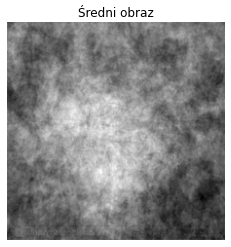

In [42]:
# Średni obraz jest już zapisany
# mean_image 

# Konwersja średniego obrazu z wektora na macierz o wymiarach 224x224
mean_image_matrix = mean_image.reshape(224, 224)

# Wyświetlenie średniego obrazu
plt.imshow(mean_image_matrix, cmap='gray')
plt.axis('off')
plt.title('Średni obraz')
plt.show()

### 4. Jak wyglądają znalezione nowe wektory bazowe (ang. principal axes)? Zaprezentuj je posortowane według powiązanej wariancji. Zauważ, że wektory bazowe też są wektorami z oryginalnej przestrzeni. Ponieważ oryginalna przestrzeń zawierała zdjęcia, to znalezioną nową, lepszą bazę możemy również zwizualizować w postaci obrazów, tak jak średnią fotografię z poprzedniego punktu.

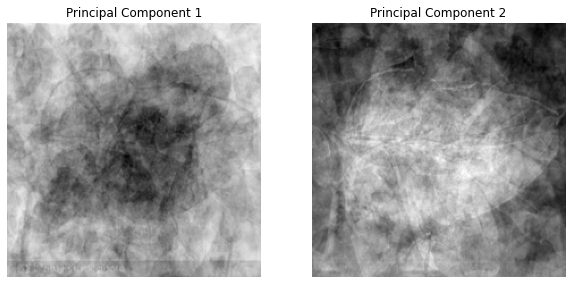

In [43]:
# Pobranie wektorów bazowych (głównych składowych) z modelu PCA
principal_components = pca.components_

# Sortowanie wektorów bazowych według powiązanej wariancji (współczynnika wyjaśnionej wariancji)
sorted_indices = np.argsort(pca.explained_variance_ratio_)[::-1]  # Sortowanie malejąco
sorted_principal_components = principal_components[sorted_indices]

# Wyświetlenie wektorów bazowych jako obrazów
plt.figure(figsize=(10, 5))
for i in range(2):  # Wyświetlenie dwóch głównych składowych
    plt.subplot(1, 2, i + 1)
    pc_matrix = sorted_principal_components[i].reshape(224, 224)  # Przekształcenie wektora bazowego na macierz obrazu
    plt.imshow(pc_matrix, cmap='gray')
    plt.title('Principal Component {}'.format(i + 1))
    plt.axis('off')
plt.show()

### 5. Zredukuj wymiarowość obserwacji do odpowiednio 3, 9 i 27 najważniejszych składowych, czyli cech w nowej bazie (ang. principal components). Jak wyglądają tak ”odchudzone” z wymiarów zdjęcia? Żeby odpowiedzieć na to pytanie wykonaj poniższe kroki.
#### (a) Wyzeruj wszystkie wartości składowych, poza wybranymi najważniejszymi składowymi.

In [44]:
# Wybór liczby najważniejszych składowych
num_components = [3, 9, 27]

# Zerowanie składowych poza najważniejszymi
zeroed_components = []
for num in num_components:
    zeroed_component = np.zeros_like(principal_components)
    zeroed_component[:, :num] = principal_components[:, :num]
    zeroed_components.append(zeroed_component)

In [45]:
# Powielenie średniego wektora, aby miał taką samą liczbę wierszy jak przetransformowane zdjęcia
mean_image_expanded = np.tile(mean_image, (Z.shape[0], 1))

# Przekształcenie wektora średniego w tablicę dwuwymiarową
mean_image_expanded_2d = mean_image_expanded.reshape(1, -1)

# Wyzerowanie składowych poza wybranymi najważniejszymi
zeroed_mean_images = []
for num in num_components:
    zeroed_mean_image = np.zeros_like(mean_image_expanded_2d)
    zeroed_mean_image[:, :num] = mean_image_expanded_2d[:, :num]
    zeroed_mean_images.append(zeroed_mean_image)

#### (b) Przetransformuj tak zmodyfikowane zdjęcia do oryginalnej bazy.

In [46]:
# Przetransformowanie zmodyfikowanych zdjęć do oryginalnej bazy
mean_transformed_images = []
for component in zeroed_mean_images:
    mean_transformed_image = np.dot(Z, component[:, :Z.shape[1]].T)
    mean_transformed_images.append(mean_transformed_image)

In [47]:
# Przetransformowanie zmodyfikowanych zdjęć do oryginalnej bazy
transformed_images = []
for component in zeroed_components:
    # Użycie odpowiednio 3, 9 i 27 pierwszych kolumn macierzy component
    transformed_image = np.dot(Z, component[:, :Z.shape[1]].T)
    transformed_images.append(transformed_image)

#### (c) Do każdego zdjęcia dodaj średni wektor, odwracając wycentrowanie.

In [48]:
i = 0

recentered_images = []
for image in transformed_images:
    recentered_image = image + mean_transformed_images[i]
    recentered_images.append(recentered_image)
    i+= 1

#### (d) Przekształć wektor do kształtu zdjęcia i wyświetl.

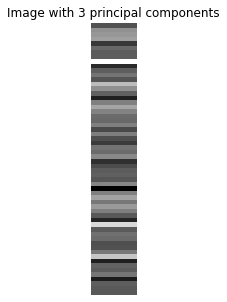

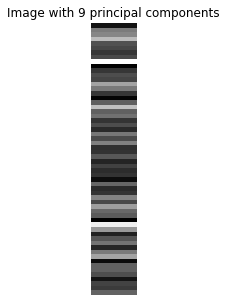

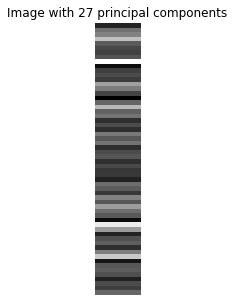

In [49]:
# Przekształcenie wektora do kształtu zdjęcia i wyświetlenie
for i, image in enumerate(recentered_images):
    plt.figure(figsize=(5, 5))
    plt.imshow(image.reshape(60, 10), cmap='gray')
    plt.title('Image with {} principal components'.format(num_components[i]))
    plt.axis('off')
    plt.show()

### 6. Na koniec użyj PCA do zrzutowania zbioru na płaszczyznę.
#### (a) Zredukuj wymiarowość do 2 najważniejszych aspektów danych. Nie zeruj odrzucanych cech, zamiast tego skróć wektory (obserwacje powinny stać się wektorami dwuwymiarowymi).


In [50]:
import matplotlib.pyplot as plt

# Utwórz instancję PCA z dwoma składowymi
pca_2d = PCA(n_components=2)

# Dopasuj PCA do danych i przekształć je do dwóch najważniejszych składowych
Z_2d = pca_2d.fit_transform(X)

#### (b) Użyj tych wektorów 2D jako współrzędnych na płaszczyźnie. Każdą obserwację zaznacz markerem, uzależniając kolor lub kształt markera od rodzaju choroby, którą przedstawiało dane zdjęcie

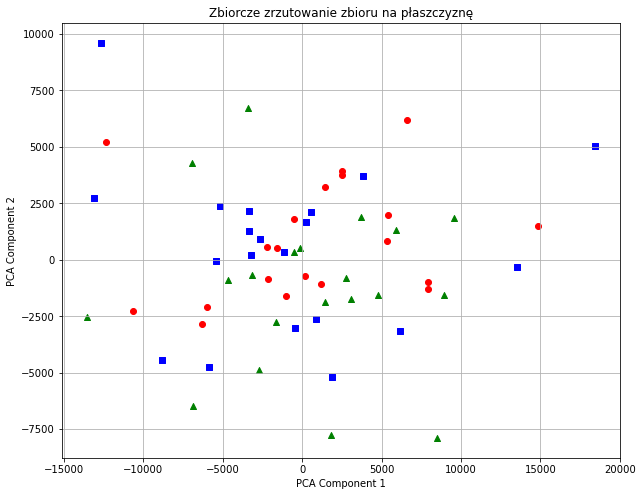

In [51]:
# Utwórz wykres punktowy
plt.figure(figsize=(10, 8))

# Zdefiniuj kolory lub kształty markerów dla różnych chorób
colors = ['r', 'g', 'b']  # Zakładam, że mamy trzy różne rodzaje chorób
markers = ['o', '^', 's']  # Dla każdej choroby inny kształt

# Iteruj po danych i zaznacz je na wykresie
for i in range(len(Z_2d)):
    # Uzyskaj kolor i kształt markera na podstawie rodzaju choroby
    color = colors[i // 20]  # 20 zdjęć dla każdej choroby
    marker = markers[i // 20]
    plt.scatter(Z_2d[i, 0], Z_2d[i, 1], color=color, marker=marker)

plt.title('Zbiorcze zrzutowanie zbioru na płaszczyznę')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

## 7. Przedstaw wykres wariancji wyjaśnionej w zależności od liczby głównych składowych

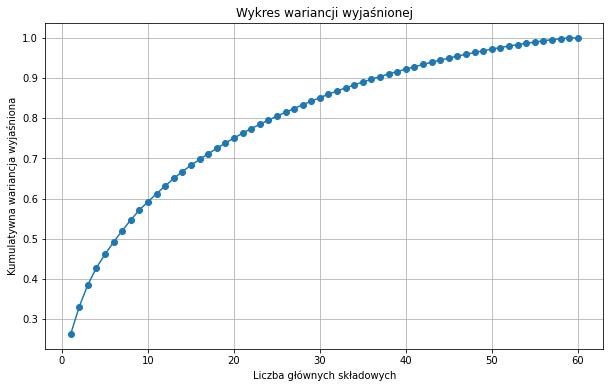

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Utwórz instancję PCA z pełną liczbą składowych
pca_full = PCA()

# Dopasuj PCA do danych
pca_full.fit(X)

# Oblicz procentową wariancję wyjaśnioną dla każdej składowej
explained_variance_ratio = pca_full.explained_variance_ratio_

# Oblicz kumulatywną sumę wariancji wyjaśnionej
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Utwórz wykres
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Wykres wariancji wyjaśnionej')
plt.xlabel('Liczba głównych składowych')
plt.ylabel('Kumulatywna wariancja wyjaśniona')
plt.grid(True)
plt.show()